# Resource Notebook

This IPython Notebook describes some technologies per the table of contents.


### Table of Contents
* Part 1: Splunk
* Part 2: IPython Notebook formatting with sympy and mathjax LaTeX



# Part 1: Splunk

Splunk is a self-described disruptive technology that immediately confronts you with some jargon. The premise is of course business-driven: Information is out there on the web that could allow you to make money; we're going to enable you to interpret that data fast. I begin by defining some of that jargon in order to economically describe the Splunk value proposition. The open question then becomes: How might this translate to research?

### Splunk Lexicon
* Machine Data: Data you can get to produced in vast quantities by machines
* Operational Intelligence: Knowledge of what's happening (implicitly 'in the business world') as it happens
* Splunk Query Language:
* Splunk Administrator: A cognizant person who translates business logic to Splunk Query Language
* Splunk Dashboard: 

### Splunk Value Proposition

 
Splunk enables you to quickly turn machine data into business insights and dashboards. 

Ask any question; work on data without the laborious 'collect the data' step.

"All you need is a web browser and some imagination."

Splunk happens in near-real-time without subscribing to the Data Warehouse model. 

### Splunk Video Links

Related Emergent Technologies

* SQL Stream
* Okunu
* Sumo? Suma? Logic
* Extra Hot Networks

# Part 2: IPython Notebook formatting with Sympy and Mathjax LaTeX

In [1]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

from __future__ import division
import sympy as sym
from sympy import *
x, y, z = symbols("x y z")
k, m, n = symbols("k m n", integer=True)
f, g, h = map(Function, 'fgh')


In [2]:
Rational(3,2)*pi + exp(I*x) / (x**2 + y)


3*pi/2 + exp(I*x)/(x**2 + y)

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot_taylor_approximations(func, x0=None, orders=(2, 4), xrange=(0,1), yrange=None, npts=200):
    """Plot the Taylor series approximations to a function at various orders.

    Parameters
    ----------
    func : a sympy function
    x0 : float
      Origin of the Taylor series expansion.  If not given, x0=xrange[0].
    orders : list
      List of integers with the orders of Taylor series to show.  Default is (2, 4).
    xrange : 2-tuple or array.
      Either an (xmin, xmax) tuple indicating the x range for the plot (default is (0, 1)),
      or the actual array of values to use.
    yrange : 2-tuple
      (ymin, ymax) tuple indicating the y range for the plot.  If not given,
      the full range of values will be automatically used. 
    npts : int
      Number of points to sample the x range with.  Default is 200.
    """
    if not callable(func):
        raise ValueError('func must be callable')
    if isinstance(xrange, (list, tuple)):
        x = np.linspace(float(xrange[0]), float(xrange[1]), npts)
    else:
        x = xrange
    if x0 is None: x0 = x[0]
    xs = sym.Symbol('x')
    # Make a numpy-callable form of the original function for plotting
    fx = func(xs)
    f = sym.lambdify(xs, fx, modules=['numpy'])
    # We could use latex(fx) instead of str(), but matploblib gets confused
    # with some of the (valid) latex constructs sympy emits.  So we play it safe.
    plt.plot(x, f(x), label=str(fx), lw=2)
    # Build the Taylor approximations, plotting as we go
    apps = {}
    for order in orders:
        app = fx.series(xs, x0, n=order).removeO()
        apps[order] = app
        # Must be careful here: if the approximation is a constant, we can't
        # blindly use lambdify as it won't do the right thing.  In that case, 
        # evaluate the number as a float and fill the y array with that value.
        if isinstance(app, sym.numbers.Number):
            y = np.zeros_like(x)
            y.fill(app.evalf())
        else:
            fa = sym.lambdify(xs, app, modules=['numpy'])
            y = fa(x)
        tex = sym.latex(app).replace('$', '')
        plt.plot(x, y, label=r'$n=%s:\, %s$' % (order, tex) )
        
    # Plot refinements
    if yrange is not None:
        plt.ylim(*yrange)
    plt.grid()
    plt.legend(loc='best').get_frame().set_alpha(0.8)


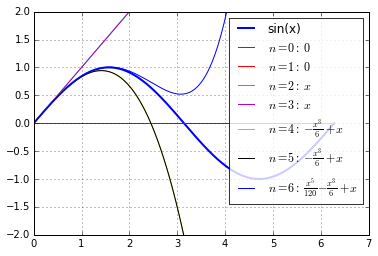

In [11]:
# The arguments are as follows: 
#   sin = the function of interest; note it's Taylor expansion uses only odd exponents so as presented here there
#         is some degeneracy: Order 1 is the same as Order 0 etcetera.
#   x = 0 is the point around which the Taylor 
#   [0, 1, ...] is a list of orders to plot
#   (0, 2pi) is a tuple domain
#   (-2, 2) is a tuple plot range
#   300 is the number of points to plot
#
# The actual sine function is plotted as well
plot_taylor_approximations(sin, 0, [0, 1, 2, 3, 4, 5, 6], (0, 2*pi), (-2,2), 300)


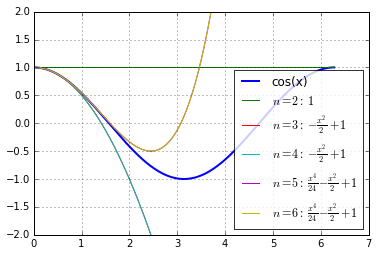

In [12]:
plot_taylor_approximations(cos, 0, [2, 3, 4, 5, 6], (0, 2*pi), (-2,2), 300)

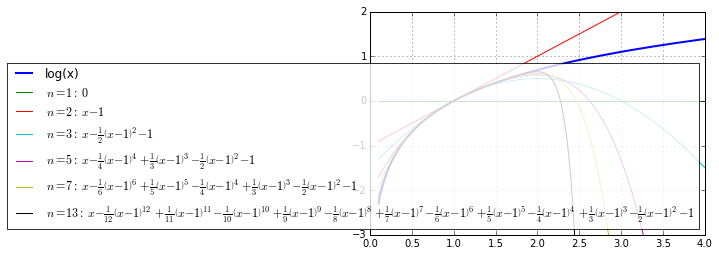

In [24]:
plot_taylor_approximations(ln, 1, [1, 2, 3, 5, 7, 13], (0.1, 4), (-3,2), 300)

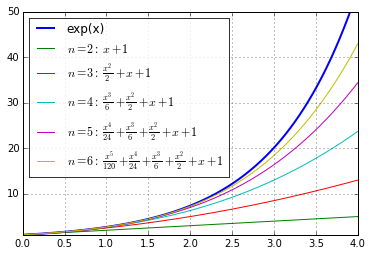

In [17]:
plot_taylor_approximations(exp, 0, [2, 3, 4, 5, 6], (0, 4), (1,50), 300)

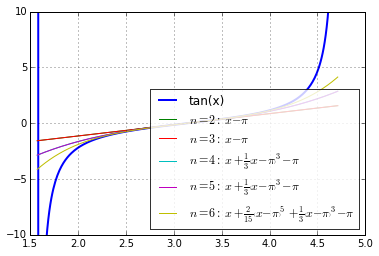

In [26]:
plot_taylor_approximations(tan, pi, [2, 3, 4, 5, 6], (pi/2, 3*pi/2), (-10,10), 300)

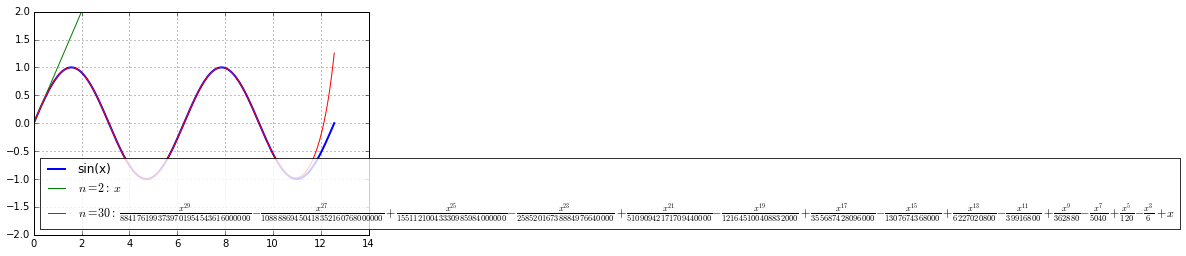

In [7]:
plot_taylor_approximations(sin, 0, [2, 30], (0, 4*pi), (-2,2))

In [8]:
def plot_taylor_approximations(func, x0=None, orders=(2, 4), xrange=(0,1), yrange=None, npts=200):
    """Plot the Taylor series approximations to a function at various orders.

    Parameters
    ----------
    func : a sympy function
    x0 : float
      Origin of the Taylor series expansion.  If not given, x0=xrange[0].
    orders : list
      List of integers with the orders of Taylor series to show.  Default is (2, 4).
    xrange : 2-tuple or array.
      Either an (xmin, xmax) tuple indicating the x range for the plot (default is (0, 1)),
      or the actual array of values to use.
    yrange : 2-tuple
      (ymin, ymax) tuple indicating the y range for the plot.  If not given,
      the full range of values will be automatically used. 
    npts : int
      Number of points to sample the x range with.  Default is 200.
    """
    if not callable(func):
        raise ValueError('func must be callable')
    if isinstance(xrange, (list, tuple)):
        x = np.linspace(float(xrange[0]), float(xrange[1]), npts)
    else:
        x = xrange
        
    if x0 is None: x0 = x[0]
    xs = sym.Symbol('x')
    
    # Make a numpy-callable form of the original function for plotting
    fx = func(xs)
    f = sym.lambdify(xs, fx, modules=['numpy'])
    
    # We could use latex(fx) instead of str(), but matploblib gets confused
    # with some of the (valid) latex constructs sympy emits.  So we play it safe.
    plt.plot(x, f(x), label=str(fx), lw=2)
    
    # Build the Taylor approximations, plotting as we go
    apps = {}
    for order in orders:
        app = fx.series(xs, x0, n=order).removeO()
        apps[order] = app
        # Must be careful here: if the approximation is a constant, we can't
        # blindly use lambdify as it won't do the right thing.  In that case, 
        # evaluate the number as a float and fill the y array with that value.
        if isinstance(app, sym.numbers.Number):
            y = np.zeros_like(x)
            y.fill(app.evalf())
        else:
            fa = sym.lambdify(xs, app, modules=['numpy'])
            y = fa(x)
        tex = sym.latex(app).replace('$', '')
        plt.plot(x, y, label=r'$n=%s:\, %s$' % (order, tex) )
        
    # Plot refinements
    if yrange is not None:
        plt.ylim(*yrange)
    plt.grid()
    # plt.legend(loc='best').get_frame().set_alpha(0.8)


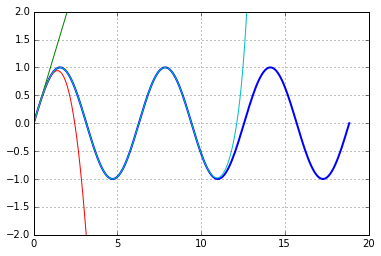

In [9]:
plot_taylor_approximations(sin, 0, [2, 4, 30], (0, 6*pi), (-2,2))


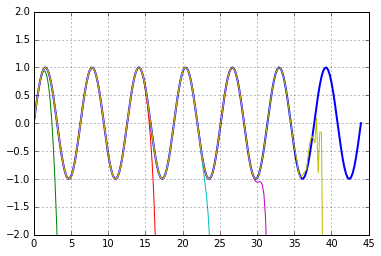

In [10]:
plot_taylor_approximations(sin, 0, [4, 41, 60, 80, 100], (0, 14*pi), (-2,2))